In [17]:
import matplotlib.pyplot as plt
from pytz import timezone
import datetime
import solarsystem

In [26]:
# now    = datetime.datetime.now(timezone('US/Eastern'))
now    = datetime.datetime.now(datetime.timezone.utc)
year   = now.year
month  = now.month
day    = now.day
hour   = now.hour
minute = now.minute
UT     = 0
dst = 0

print(year, month, day, hour, minute, UT, dst)

2022 8 11 12 0 0 0


In [3]:
view='horizontal'

In [4]:
H = solarsystem.Heliocentric(year=year, month=month, day=day, hour=hour, minute=minute, 
                         UT=UT, dst=dst, view=view )

In [5]:
planets=H.planets()
distances=[]
print('Planet', '   \t','Longitude', '  \t','Latitude', '   \t','Distance')
print('-------------------------------------------------------------------')
for key in planets:
    distances.append(planets[key][2])
    elements = planets[key]
    print(key, '   \t',round(elements[0],2), '  \t',round(elements[1],2), '   \t',round(elements[2],2))
print()
print('Distance is in AU')

Planet    	 Longitude   	 Latitude    	 Distance
-------------------------------------------------------------------
Mercury    	 222.58   	 0.74    	 0.45
Venus    	 92.14   	 0.89    	 0.72
Earth    	 318.8   	 0.0    	 1.01
Mars    	 8.6   	 -1.22    	 1.4
Jupiter    	 359.46   	 358.72    	 4.96
Saturn    	 321.79   	 358.83    	 9.89
Uranus    	 45.93   	 359.63    	 19.67
Neptune    	 353.81   	 -1.18    	 29.89
Pluto    	 297.45   	 357.9    	 34.51
Ceres    	 124.46   	 7.39    	 2.57
Chiron    	 13.33   	 1.92    	 18.81
Eris    	 24.12   	 -11.23    	 95.79

Distance is in AU


In [6]:
Hr = solarsystem.Heliocentric(year=year, month=month, day=day, hour=hour, minute=minute, 
                         UT=UT, dst=dst, view='rectangular' )
planetspositionsHrect=Hr.planets()
# planetspositionsHrect

In [7]:
forplot=[]
planetname=[]
for key in planetspositionsHrect:
    planetname.append(key)
    forplot.append(   planetspositionsHrect[key] )

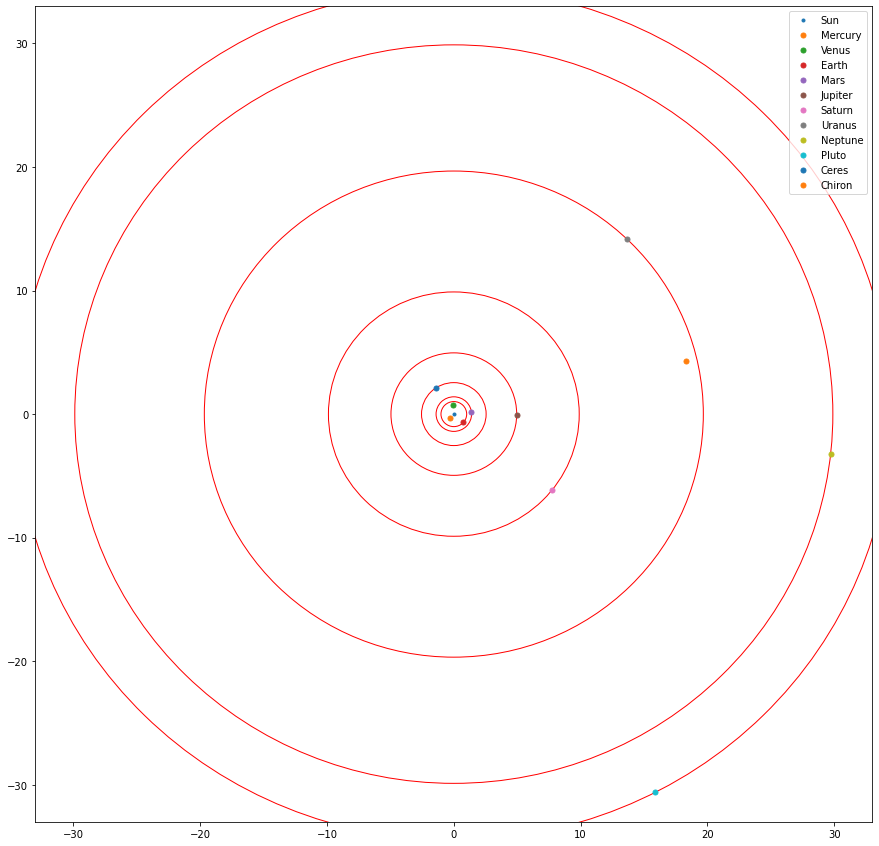

In [8]:
plt.figure(figsize=(15,15))
ax = plt.gca()
ax.cla() # clear things for fresh plot
# ax.set_xlim((-6, 6))
# ax.set_ylim((-6, 6))
ax.set_xlim((-33, 33))
ax.set_ylim((-33, 33))
a=0.5
ax.plot(0,0,'.', label='Sun') 
for i in range(11):
    ax.plot(forplot[i][0] , forplot[i][1] ,'.', markersize=10, label=planetname[i]) 
    if (i >1) & (i < 10):
        ax.add_artist(plt.Circle((0, 0), ((abs(forplot[i][0])**2+abs(forplot[i][1])**2)**0.5), color='r', fill=False))
ax.legend()
plt.show()

In [9]:
Geq = solarsystem.Geocentric(year=year, month=month, day=day, hour=hour, minute=minute, 
                         UT=UT, dst=dst, plane='equatorial')
Geqp=Geq.position()


print('Object','    \t','Right Ascension','\t','Declination','\t','Distace in AU')
print('-----------------------------------------------------------------------')
for i in Geqp:
    print(i,'    \t',solarsystem.demical2hms(Geqp[i][0]),'      \t',
          solarsystem.demical2arcs(Geqp[i][1]),'\t',round(Geqp[i][2],2))

Object     	 Right Ascension 	 Declination 	 Distace in AU
-----------------------------------------------------------------------
Sun     	 9h 24m 55s       	 15° 11.23' 	 1.01
Mercury     	 10h 51m 57s       	 7° 32.23' 	 1.15
Venus     	 8h 7m 39s       	 20° 36.88' 	 1.6
Mars     	 3h 30m 57s       	 17° 24.12' 	 1.07
Jupiter     	 0h 33m 17s       	 1° 58.01' 	 4.24
Saturn     	 21h 39m 43s       	 -15° 21.64' 	 8.88
Uranus     	 3h 6m 6s       	 17° 4.97' 	 19.65
Neptune     	 23h 43m 24s       	 -3° 6.92' 	 29.07
Pluto     	 19h 57m 14s       	 -22° 54.68' 	 33.57
Ceres     	 8h 49m 50s       	 23° 16.48' 	 3.55
Chiron     	 0h 55m 35s       	 8° 5.54' 	 18.24
Eris     	 1h 47m 53s       	 0° 57.08' 	 95.38


In [27]:
# New York Coordinates
# longtitude = -73.935242
# latitude   = 40.730610
longtitude = 0
latitude   = 51.5

moon = solarsystem.Moon(year=year, month=month, day=day, hour=hour, minute=minute, UT=UT, dst=dst, longtitude=longtitude, latitude=latitude, topographic=True)
moon_position = moon.position()

In [28]:
moon_position

(310.5581518505673, -5.9004448063425174, 56.50319480244967)

In [12]:
moon_position_eq=solarsystem.spherical_ecliptic2equatorial(moon_position[0],moon_position[1],moon_position[2],H.oblecl)


In [13]:
Geq = solarsystem.Geocentric(year=year, month=month, day=day, hour=hour, minute=minute, 
                         UT=UT, dst=dst, plane='equatorial')
Geqp=Geq.position()


print('Object','    \t','Right Ascension','\t','Declination','\t','Distace in AU')
print('-----------------------------------------------------------------------')
for i in Geqp:
    print(i,'    \t',solarsystem.demical2hms(Geqp[i][0]),'      \t',
          solarsystem.demical2arcs(Geqp[i][1]),'\t',round(Geqp[i][2],2))

Object     	 Right Ascension 	 Declination 	 Distace in AU
-----------------------------------------------------------------------
Sun     	 9h 24m 55s       	 15° 11.23' 	 1.01
Mercury     	 10h 51m 57s       	 7° 32.23' 	 1.15
Venus     	 8h 7m 39s       	 20° 36.88' 	 1.6
Mars     	 3h 30m 57s       	 17° 24.12' 	 1.07
Jupiter     	 0h 33m 17s       	 1° 58.01' 	 4.24
Saturn     	 21h 39m 43s       	 -15° 21.64' 	 8.88
Uranus     	 3h 6m 6s       	 17° 4.97' 	 19.65
Neptune     	 23h 43m 24s       	 -3° 6.92' 	 29.07
Pluto     	 19h 57m 14s       	 -22° 54.68' 	 33.57
Ceres     	 8h 49m 50s       	 23° 16.48' 	 3.55
Chiron     	 0h 55m 35s       	 8° 5.54' 	 18.24
Eris     	 1h 47m 53s       	 0° 57.08' 	 95.38


In [15]:
Geqp

{'Sun': (141.22950780704818, 15.18718665718799, 1.013504842103665),
 'Mercury': (162.98882198447302, 7.5370918394908335, 1.1504825589976677),
 'Venus': (121.91284086767607, 20.61466443886972, 1.5955673046952126),
 'Mars': (52.73782948370903, 17.401954404351837, 1.0748404313451783),
 'Jupiter': (8.322632915967052, 1.9669159216439456, 4.241261607748929),
 'Saturn': (324.9329225181553, -15.360685188489324, 8.878421108823007),
 'Uranus': (46.527790190851576, 17.082765518259514, 19.64967936595472),
 'Neptune': (355.8530454353068, -3.115375087285226, 29.069948868231076),
 'Pluto': (299.30909735802055, -22.911411171918655, 33.573310117294575),
 'Ceres': (132.46208749490174, 23.274586660457732, 3.553480882871411),
 'Chiron': (13.896022119167089, 8.092374670800941, 18.24122962594232),
 'Eris': (26.97303212660071, -0.9513028116291319, 95.37842901852369)}